In [2]:
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')
print(data.head())
print(data.isnull().sum())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<ipython-input-2-9053ba8fc22c>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/creditcard.csv')


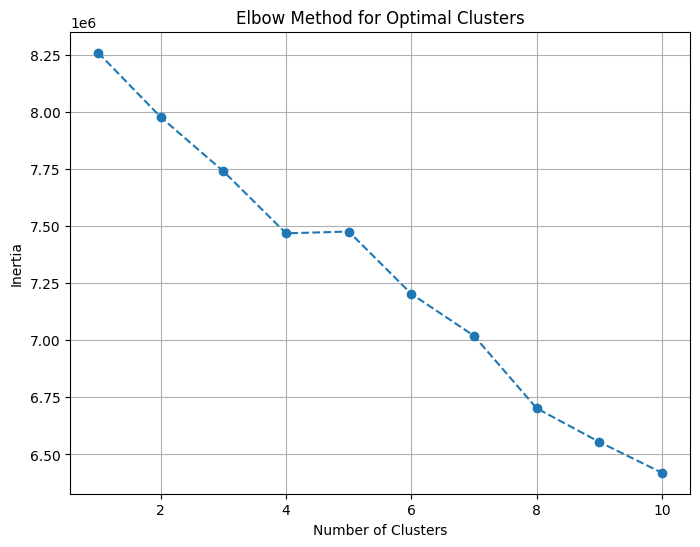

Davies-Bouldin Index: 1.4865


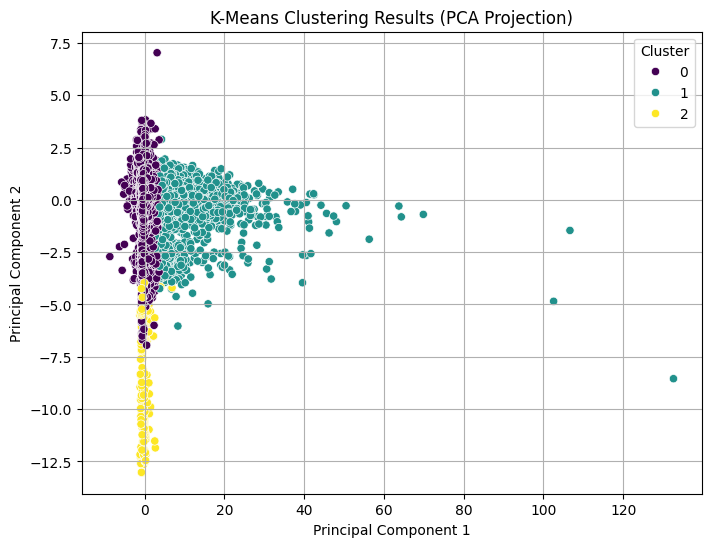

DBSCAN identified 711 clusters (excluding noise).


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


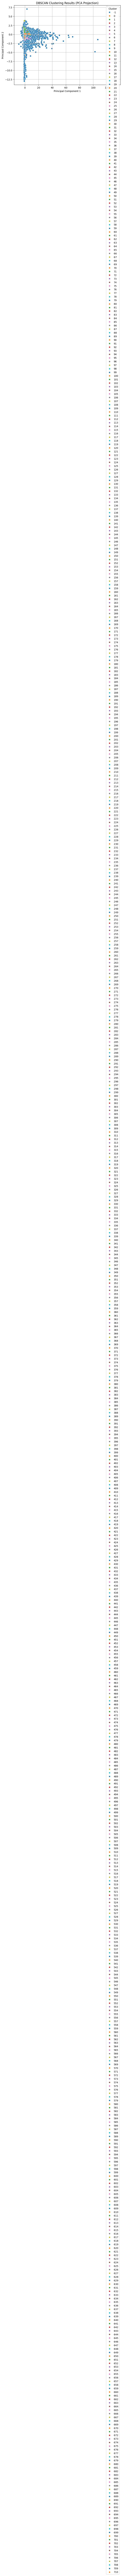


Summary of Clustering Results:
K-Means optimal clusters: 3
Davies-Bouldin Index: 1.4865
DBSCAN identified 711 clusters (excluding noise).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Load your dataset
data = pd.read_csv('/content/creditcard.csv')

# Preprocess the dataset
# Drop unnecessary columns (e.g., 'Time', 'Class')
data_preprocessed = data.drop(['Time', 'Class'], axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_preprocessed)

# K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

db_index = davies_bouldin_score(data_scaled, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

# Visualize K-Means clustering results (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('K-Means Clustering Results (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Check for the number of clusters identified by DBSCAN (-1 indicates noise points)
unique_clusters = np.unique(dbscan_labels)
print(f"DBSCAN identified {len(unique_clusters) - 1} clusters (excluding noise).")

# Visualize DBSCAN clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=dbscan_labels, palette='tab10', legend='full')
plt.title('DBSCAN Clustering Results (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Summary
print("\nSummary of Clustering Results:")
print(f"K-Means optimal clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"DBSCAN identified {len(unique_clusters) - 1} clusters (excluding noise).")


K-Means Cluster Distribution:
 Class                0    1
KMeans_Cluster             
0               278692  266
1                 5583   17
2                   40  209

DBSCAN Cluster Distribution:
 Class               0    1
DBSCAN_Cluster            
-1              49732  419
 0              80204   13
 1              72050    9
 2               6501    0
 3               9494    0
...               ...  ...
 706                6    0
 707                5    0
 708                7    0
 709                6    0
 710                5    0

[712 rows x 2 columns]


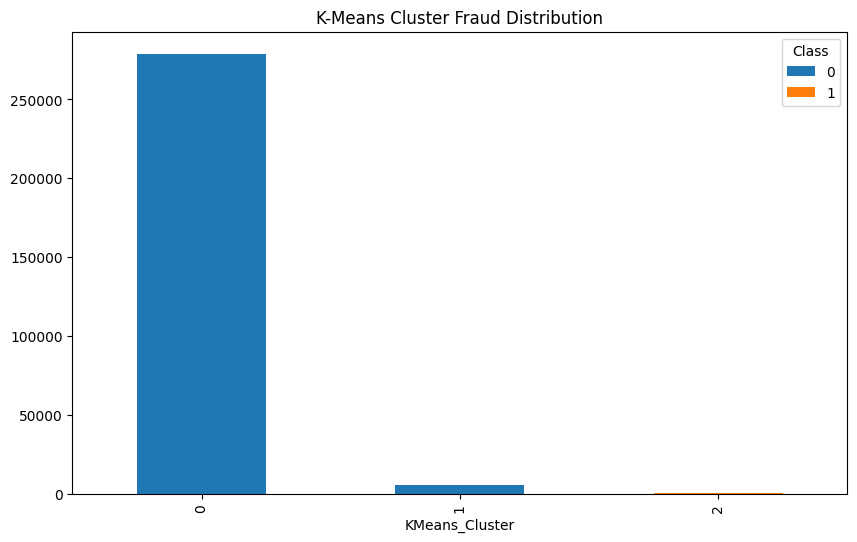

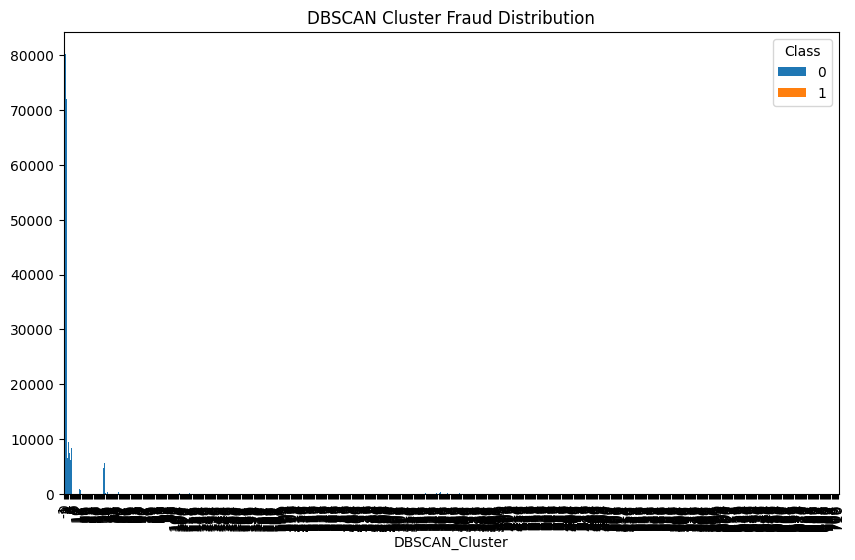

K-Means ARI: 0.0681
K-Means NMI: 0.0772


In [9]:
data_preprocessed['Class'] = data['Class']
data_preprocessed['KMeans_Cluster'] = kmeans_labels
data_preprocessed['DBSCAN_Cluster'] = dbscan_labels
kmeans_cluster_distribution = pd.crosstab(data_preprocessed['KMeans_Cluster'], data_preprocessed['Class'])
dbscan_cluster_distribution = pd.crosstab(data_preprocessed['DBSCAN_Cluster'], data_preprocessed['Class'])

print("K-Means Cluster Distribution:\n", kmeans_cluster_distribution)
print("\nDBSCAN Cluster Distribution:\n", dbscan_cluster_distribution)
kmeans_cluster_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), title="K-Means Cluster Fraud Distribution")
plt.show()

dbscan_cluster_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), title="DBSCAN Cluster Fraud Distribution")
plt.show()
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_kmeans = adjusted_rand_score(data_preprocessed['Class'], kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(data_preprocessed['Class'], kmeans_labels)

print(f"K-Means ARI: {ari_kmeans:.4f}")
print(f"K-Means NMI: {nmi_kmeans:.4f}")
